
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Demonstrating and Calculating Model Bias with Simple Predictive Machine Learning Methods

#### Blazej Ksiazek
#### Hildebrand Department of Petroleum & Geosystems Engineering, The University of Texas at Austin

#### Final Graduate Project for Subsurface Machine Learning 


### Executive Summary
This workflow will demonstrate the effects of bias in machine learning models. The questions we will answer are:
* Does bias in data result in bias in our model? - Bias in = Bias out?
* If there is bias, what are methods to account for or reduce this bias?

This workflow analyzes the results of simple predicitve machine learning model, linear regression, with a dataset containing porosity and permeability values at various sampled locations. We will be using this dataset to predict permeability from porosity. What we expect to see is that, yes bias in does equal bias out. Additionally, the mitigation of bias will result in a more accurate machine learning model.

Why is this important?

Accounting for bias in our model is important since the data we acquire is usually preferentially sampled. Obtaining random samples over the entire region of interest is unrealistic since this requires a lot of time and resources. Therefore, addressing bias in datasets is a way to overcome these economic limitations.

## Importing Packages
We begin by importing the packages that we will be utilizing in this workflow. 

In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import scipy.stats as st                  # statistical methods

## Importing our Dataset
We import our biased dataset as a Pandas DataFrame

In [2]:
df = pd.read_csv('12_sample_data.csv') # load our dataset 
df.head()                         # Examine the first 5 rows of our dataset

,X,Y,Porosity,Perm
0,50,900,0.220761,140.021266
1,50,850,0.237154,39.837129
2,50,800,0.234352,84.992437
3,50,750,0.244553,90.632307
4,50,700,0.231787,811.547979


## Display Summary Statistics
We display our summary statistics to see if we have any unreasonable values in our dataset such as negatives, and to see a description of the data we are working with such as the number of data and averages.

In [3]:
df.describe() #Disply summary statistics for our dataset

,X,Y,Porosity,Perm
count,480.000000,480.000000,480.000000,480.000000
mean,430.187500,522.166667,0.189440,520.932093
std,263.832692,284.293420,0.031702,1226.207190
min,0.000000,19.000000,0.117562,0.005776
25%,200.000000,279.000000,0.165884,6.539988
50%,390.000000,539.000000,0.185443,49.451463
75%,630.000000,759.000000,0.216513,369.470756
max,980.000000,999.000000,0.261091,10319.904850


Determine the range of data that we want to work with using the summary statisitcs from above. As well as picking a colormap to visualize our data.

In [4]:
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
pormin = 0.05; pormax = 0.27;           # range of porosity values
permmin = 0.0; permmax = 10400;           # range of logpermeability values
cmap = plt.cm.inferno                   # color map

## Linear Regression
In this next segment, we will use linear regression for predicting porosity from log permeability.

About Linear Regression:

Linear Regression is a simple parametric machine learning model. The model's loss function to be minized to train our model parameters with the training data is: $$\sum_{i=1}^n (\Delta y_i)^2 = \sum_{i=1}^n (y_i - (\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0))^2$$

The assumptions for this model are:
* The predictor features are error free.
* The response is a linear combination of features.
* There is constant error in response over the predictors.
* The error in response is not correlated with each other
* There is no multicolinearity, which means that there is no redundancy among features.

This code is taken from the [SubsurfaceDataAnalytics_LinearRegression](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_LinearRegression.ipynb) workflow developed by Dr. Michael Pyrcz.

To facilitate in the development of this workflow, the values for porosity and log permeability from the dataframe are seperated into arrays.

In [5]:
por = df['Porosity']
perm = df["Perm"]
df['logperm'] = np.log(df['Perm']) #take the natural log of permeability
logperm = df['logperm']
df.head()


,X,Y,Porosity,Perm,logperm
0,50,900,0.220761,140.021266,4.941794
1,50,850,0.237154,39.837129,3.684799
2,50,800,0.234352,84.992437,4.442562
3,50,750,0.244553,90.632307,4.506811
4,50,700,0.231787,811.547979,6.698944


Below is our raw data plotted of porosity vs permeability. As we can see it is not linearly correlated. Therefore, to perform linear regression, we calculate and plot log permeability vs porosity. We see that we get a more linear relationship and can proceed with linear regression.

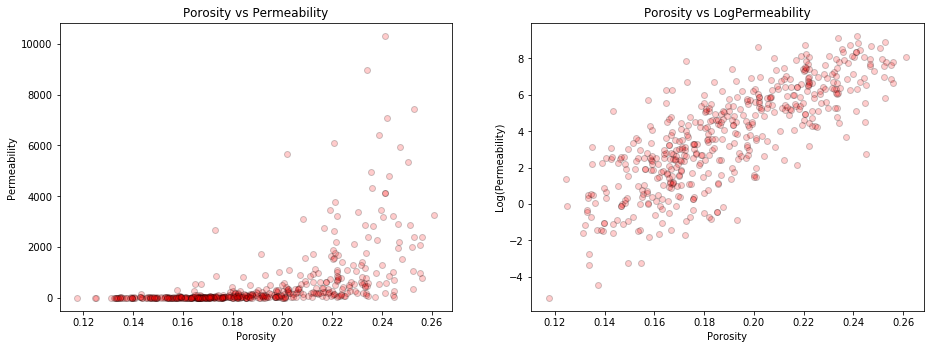

In [6]:
plt.subplot(121)
plt.plot(por, perm, 'o', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Porosity vs Permeability')
plt.xlabel('Porosity')
plt.ylabel('Permeability')   
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)


plt.subplot(122)
plt.plot(por, logperm, 'o', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Porosity vs LogPermeability')
plt.xlabel('Porosity')
plt.ylabel('Log(Permeability)')   
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()



The linear regression model is calculated using the linregress function from the scipy.stats library 

In [7]:
slope, intercept, r_value, p_value, std_err = st.linregress(por,logperm)

print('The model parameters are, slope (b1) = ' + str(round(slope,2)) + ', and the intercept (b0) = ' + str(round(intercept,2)))

The model parameters are, slope (b1) = 69.47, and the intercept (b0) = -9.39


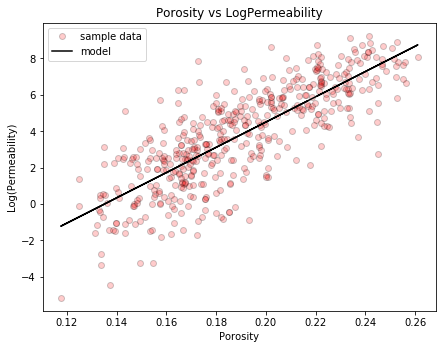

In [8]:
plt.subplot(121)
plt.plot(por, logperm, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.plot(por, intercept + slope*por, label='model', color = 'black') #plot our linear regression line
plt.title('Porosity vs LogPermeability')
plt.xlabel('Porosity')
plt.ylabel('Log(Permeability)')   
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

In [9]:
print('For no bias data: The correlation coefficient is = ' + str(round(r_value,2)) + ' and the r-squared value = ', str(round(r_value**2,2)))


For no bias data: The correlation coefficient is = 0.8 and the r-squared value =  0.63


After running the code, we obtain our linear regression model. We obtain a slope of 46.59 with an intercept of -5.77. We also get a correlation coefficient of 0.8 and an r-squared value of 0.63. Analyzing these results, we conclude that the linear regression model represents our dataset fairly well. However, we will now introduce bias to our dataset by replicating datapoints at low permeability values as well as higher permeability values.

We duplicate any data points that contain a log permeability value less than 1 twice and we will addditionally analyze the effects of duplicating all data points with a log permeability higher than 4 on our model. This will allow us to see how bias effects our model with over and under estimation. 

In [10]:
df2 = df.append([df[df['logperm'] < 1]]*2, ignore_index=True) #duplicate values with logperm<1 and add to new dataset
df3 = df.append([df[df['logperm'] > 4]]*2, ignore_index=True) #duplicate values with logperm>4 and add to new dataset


Seperate values into arrays for easier calculations

In [11]:
por2 = df2['Porosity']
perm2 = df2["Perm"]
df2['logperm'] = np.log(df2['Perm'])
logperm2 = df2['logperm']
df2.describe()

por3 = df3['Porosity']
perm3 = df3["Perm"]
df3['logperm'] = np.log(df3['Perm'])
logperm3 = df3['logperm']
df3.describe()

,X,Y,Porosity,Perm,logperm
count,956.000000,956.000000,956.000000,956.000000,956.000000
mean,359.843096,556.882845,0.200821,778.998450,4.926635
std,226.139642,274.921599,0.030310,1436.674452,2.454476
min,0.000000,19.000000,0.117562,0.005776,-5.154128
25%,197.500000,300.000000,0.178578,48.050001,3.872242
50%,340.000000,569.000000,0.202124,199.032888,5.293470
75%,490.000000,800.000000,0.223459,790.617079,6.672814
max,980.000000,999.000000,0.261091,10319.904850,9.241830


Run Linear Regression model calculations

In [12]:
slope2, intercept2, r_value2, p_value2, std_err2 = st.linregress(por2,logperm2)

print('For lower range bias, the model parameters are, slope (b1) = ' + str(round(slope2,2)) + ', and the intercept (b0) = ' + str(round(intercept2,2)))

slope3, intercept3, r_value3, p_value3, std_err3 = st.linregress(por3,logperm3)

print('For upper range bias, the model parameters are, slope (b1) = ' + str(round(slope3,2)) + ', and the intercept (b0) = ' + str(round(intercept3,2)))

For lower range bias, the model parameters are, slope (b1) = 77.88, and the intercept (b0) = -11.39
For upper range bias, the model parameters are, slope (b1) = 62.6, and the intercept (b0) = -7.65


Plot both linear regression models

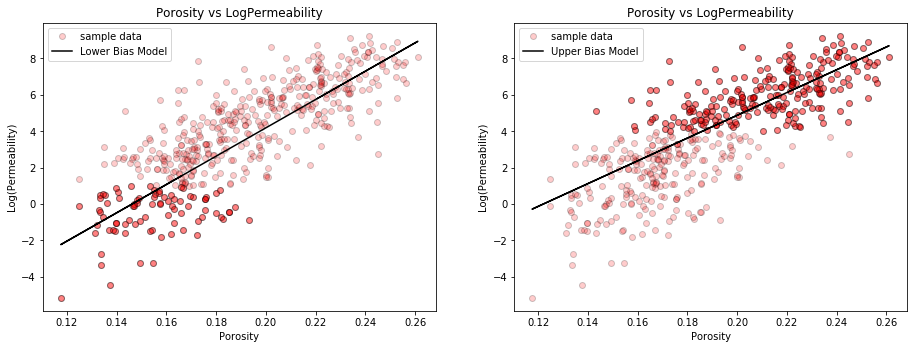

In [13]:
plt.subplot(121)
plt.plot(por2, logperm2, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.plot(por2, intercept2 + slope2*por2, label='Lower Bias Model', color = 'black')
plt.title('Porosity vs LogPermeability')
plt.xlabel('Porosity')
plt.ylabel('Log(Permeability)')   
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)


plt.subplot(122)
plt.plot(por3, logperm3, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.plot(por3, intercept3 + slope3*por3, label='Upper Bias Model', color = 'black')
plt.title('Porosity vs LogPermeability')
plt.xlabel('Porosity')
plt.ylabel('Log(Permeability)')   
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

By looking at these plots and the linear regression models, we see that we obtain a steeper slope when we add bias to our lower range (77.8) and a flatter slope (62.6) when we add bias to the upper range.

We also calculate our correlation coefficient and  $r^2$ value for each of our models.

In [14]:
print('For lower range biased data: The correlation coefficient is = ' + str(round(r_value2,2)) + ' and the r-squared value = ', str(round(r_value2**2,2)))
print('For upper range biased data: The correlation coefficient is = ' + str(round(r_value3,2)) + ' and the r-squared value = ', str(round(r_value3**2,2)))

For lower range biased data: The correlation coefficient is = 0.82 and the r-squared value =  0.67
For upper range biased data: The correlation coefficient is = 0.77 and the r-squared value =  0.6


We find that when we add data points to the lower range, we get a higher correlation coefficient and r-squared value compared to our naive dataset. However, the upper range biased model results in lower values.

## Predictions
Now we will use our models to make predicitions at all the data locations

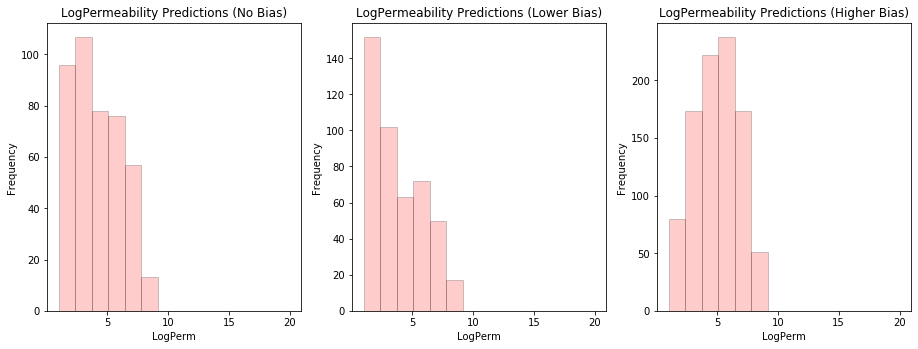

In [15]:
logperm_hat = (slope * por + intercept)
plt.subplot(131)
plt.hist(logperm_hat, color = 'red', alpha = 0.2, edgecolor = 'black', bins = np.linspace(1,20,15))
plt.xlabel('LogPerm'); plt.ylabel('Frequency'); plt.title('LogPermeability Predictions (No Bias)')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)


logperm2_hat = (slope2 * por2 + intercept2)
plt.subplot(132)
plt.hist(logperm2_hat, color = 'red', alpha = 0.2, edgecolor = 'black', bins = np.linspace(1,20,15))
plt.xlabel('LogPerm'); plt.ylabel('Frequency'); plt.title('LogPermeability Predictions (Lower Bias)')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)


logperm3_hat = (slope3 * por3 + intercept3)
plt.subplot(133)
plt.hist(logperm3_hat, color = 'red', alpha = 0.2, edgecolor = 'black', bins = np.linspace(1,20,15))
plt.xlabel('LogPerm'); plt.ylabel('Frequency'); plt.title('LogPermeability Predictions (Higher Bias)')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Above is our log permeability prediction from porosity for our 3 linear regression models. The results make sense, since our lower bias model resulted in more lower predictions and our upper bias model resulted in more higher value predictions for log permeability. This confirms our assumption that bias in does in fact equal bias out.

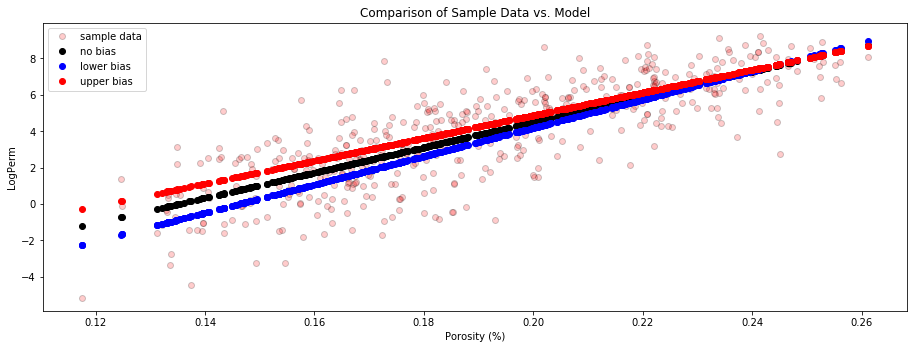

In [16]:
plt.subplot(111)
plt.plot(por, logperm, 'o', label='sample data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.plot(por, logperm_hat, 'o', label='no bias', color = 'black')
plt.plot(por2, logperm2_hat, 'o', label='lower bias', color = 'blue')
plt.plot(por3, logperm3_hat, 'o', label='upper bias', color = 'red')

plt.title('Comparison of Sample Data vs. Model')
plt.xlabel('Porosity (%)')
plt.ylabel('LogPerm')
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Above is a comparison of our sample data to all three of our models. All three models represent the data fairly well but statistcally speaking the lower bias linear regression performed the best as it had the highest correlation coefficient as well as r-squared value, which signifies that it represents more of the sample data than the other two models.

## Results and Discussion

### Results Summary

In this workflow we analyzed the effect of introducing bias to our dataset on a simple predictive machine learning model, linear regression. We did this by first performing linear regression on our sample dataset to test its performance as a way to base the effect of bias. We obtained a correlation coefficient of 0.8 and an r-squared of 0.63. We then duplicated our data points that had a logperm value less than 1. We considered this our lower bias model. After performing linear regression on this model, we obtained a higher correlation coefficient and rsqaured value than before, 0.82 and 0.67 respectively. Finally, we created another model, where we introduced bias to the upper range of our log permeability values. We duplicated any data points with log permeability values greater than 4. This resulted in lower correlation coefficient and r-squared, 0.77 and 0.6 respectively. 

### Conclusion

Analyzing these models we can conclude that yes in fact bias in does equal bias out and that bias in our data does result bias in our final model. Our model predicted higher permeabilty values from porosity when we duplicated permeability values in the upper bound. It also predicted lower permeability values at a much higher frequency than our original model when we doubled our lower permeability datapoints in our dataset. 

This further supports the need to be able to control for bias whenever creating any machine learning model. In this workflow we demonstrated how over- or underestimating the model can lead to different results. It is important to try to create your models to be a true representation of the population since any minor shifts in the data can lead to very different results and therefore may lead you to inaccurate conclusions.  






### About Me

I am currently a MS student in Petroleum & Geosystems Engineering at The University of Texas at Austin, and I am supervised by Dr. Michael Pyrcz. I graduated from the University of Tulsa in 2021 with a BS in Petroleum Engineering. 

I am interested in data analytics and machine-learning assisted subsurface resource modeling. I am additionally interested in the applications of machine learning in artificial lift and production systems.  

I hope this workflow was helpful.

**Blazej Ksiazek**

ksiazekblazej@utexas.edu

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
